<a href="https://colab.research.google.com/github/savika10/ML--classification/blob/master/Marketing_campaign_for_Banking_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**GOAL**


---



 

> The classification goal is to predict the likelihood of a liability customer buying personal loans.







In [109]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [110]:
#import the dataset
dataset=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name="Data")
df=pd.DataFrame(dataset)
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


**Attribute Information:**

● **ID:** Customer ID

● **Age:** Customer's age in completed years

● **Experience:** #years of professional experience

● **Income:** Annual income of the customer ($000)

● **ZIP Code:** Home Address ZIP code.

● **Family:** Family size of the customer

● **CCAvg:** Avg. spending on credit cards per month

● **Education:** Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● **Mortgage:** Value of house mortgage if any. 

● **Personal Loan:** Did this customer accept the personal loan offered in the last
campaign?

● **Securities Account:** Does the customer have a securities account with the bank?

● **CD Account:** Does the customer have a certificate of deposit (CD) account with
the bank?

● **Online:** Does the customer use internet banking facilities?

● **Credit card:** Does the customer use a credit card issued by the bank?






In [111]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [112]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [113]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1340,1341,35,11,82,94131,4,3.40,1,0,0,0,0,0,0
58,59,28,2,93,94065,2,0.20,1,0,0,0,0,0,0
1072,1073,54,24,75,90089,2,4.50,3,0,0,0,0,0,0
3236,3237,44,14,19,94112,1,0.75,3,0,0,0,0,0,1
2239,2240,55,29,42,95833,4,2.50,1,0,0,1,0,0,0


In [114]:
df.shape

(5000, 14)

In [115]:
df.index

RangeIndex(start=0, stop=5000, step=1)

In [116]:
df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [117]:
A= df.isnull().values.any()
print(A)


False


In [118]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [119]:
df = df.drop(['ID'],axis=1)
df.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [121]:
df.shape

(5000, 13)

In [122]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [123]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we can see Experience have minimum value as -3,hence we'll normalize it around median

In [125]:
df['Experience']-=20
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,-19.895400,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-43.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,-30.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,-20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,-10.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,3.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We noticed that even after normalizing over median minimum value is -23

In [126]:
df=df.drop('Experience',axis=1)

In [127]:
df.nunique(axis=0)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Since **zip code** have 467 unique values of 5 digit numbers, hence we have to drop zip-code column because it's difficult to transform, whereas **Mortgage** have 347 values of 3 digit numbers,hence we can transform it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb4cb3f4e0>,
      dtype=object)

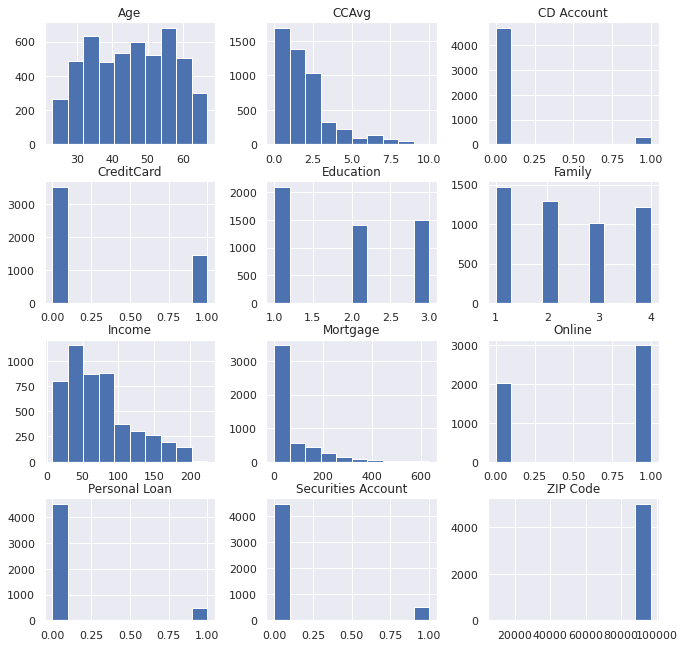

In [128]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
                        

**I have characterised the features into the four types:**


> 1. continuous : Age, Income, Mortgage
2. Dichotomous : CD Account,Online,Personal Loan,Securities account,Credit card
3. Ordinal: Education, Family





since ZIP Code is a nominal data,we'll drop it

In [129]:
df=df.drop('ZIP Code',axis=1)


In [131]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [132]:
(df.Mortgage==0).sum()

3462

In [133]:
(df.CCAvg==0).sum()

106

In [134]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [135]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [136]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [137]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [138]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [140]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**UNIVARIATE** **ANALYSIS**

In [141]:
print("income skewness value",df['Income'].skew()) 		
print("age skewness value",df['Age'].skew())
print("family skewness value",df['Family'].skew())
print("ccavg skewness value",df['CCAvg'].skew())
print("education skewness value",df['Education'].skew())
print("mortgage skewness value",df['Mortgage'].skew())



income skewness value 0.8413386072610816
age skewness value -0.02934068151284029
family skewness value 0.15522066944367582
ccavg skewness value 1.598456618052042
education skewness value 0.22709331566088503
mortgage skewness value 2.1040023191079444


**MULTIVARIATE** **ANALYSIS**

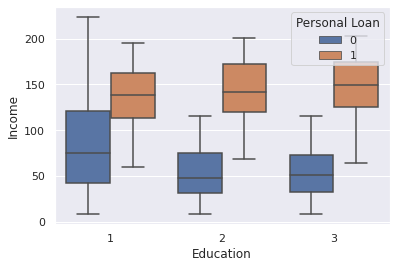

In [142]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

Customer who have more income have granted Personal Loan w.r.t Eductation Level

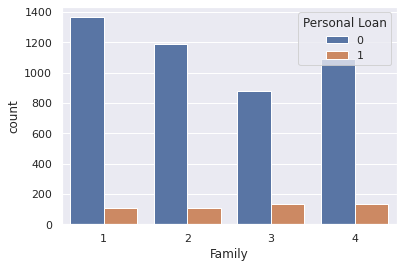

In [143]:
sns.countplot(x="Family",hue="Personal Loan",data=dataset)

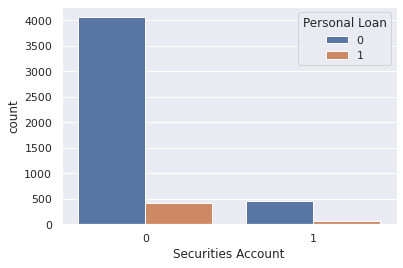

In [144]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=dataset)

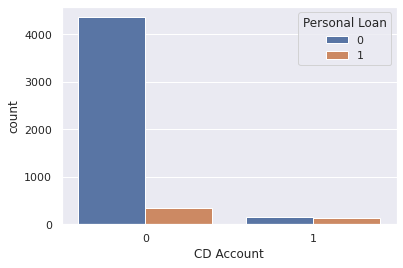

In [145]:
sns.countplot(x="CD Account",hue="Personal Loan",data=dataset)

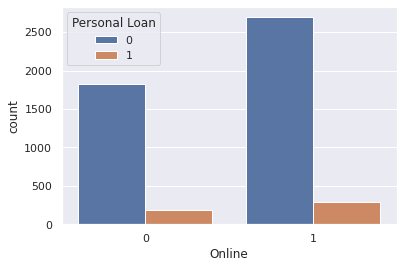

In [146]:
sns.countplot(x="Online",hue="Personal Loan",data=dataset)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003620,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


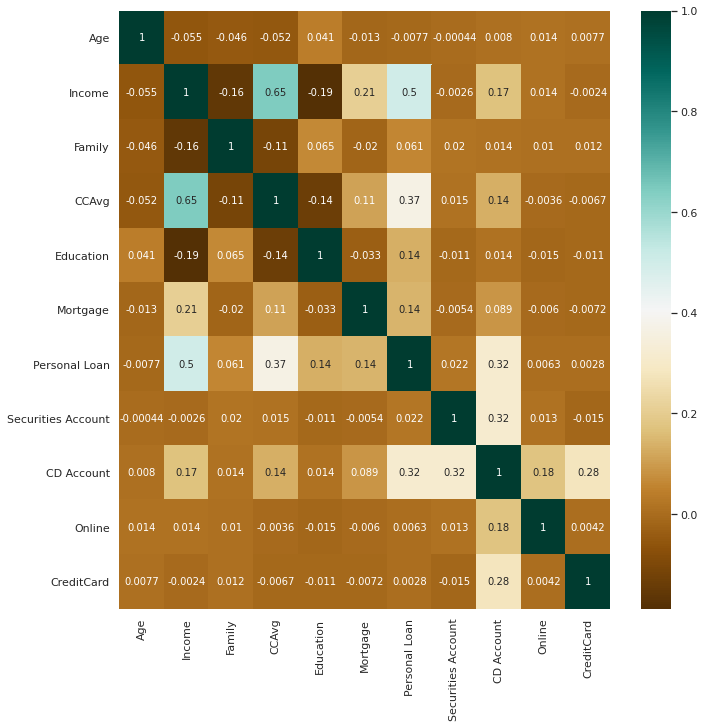

In [147]:
# Finding the relations between the variables.
plt.figure(figsize=(11,11))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

We noticed that **Income** have high correlation, which is not good, hence outlier

# **Using Yeo-Jhonsan method and binning transformation of feature variables**

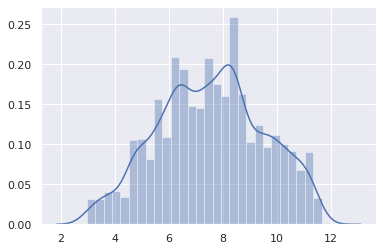

In [148]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
a=pt.transform(df["Income"].values.reshape(-1,1))
sns.distplot(a)


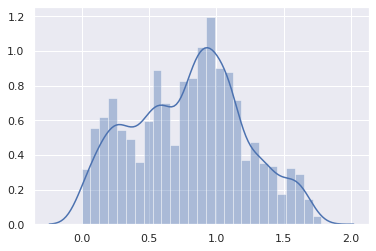

In [149]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
a=pt.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(a)


In [150]:
bins = [0, 100, 200, 300, 400, 500, 600, 700]
group_names = [ 0, 1, 2, 3, 4, 5, 6]
df['Mortgage']= pd.cut(df['Mortgage'], bins, labels=group_names,include_lowest="true")

pd.value_counts(df['Mortgage'])

0    3744
1     758
2     297
3     128
4      48
5      21
6       4
Name: Mortgage, dtype: int64

In [151]:
X=df.loc[:,df.columns != 'Personal Loans']
Y=df['Personal Loan']

**SPLITTING THE DATA USING STRATIFIED SAMPLING**

In [152]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_Y ,test_Y=train_test_split(X,Y,test_size=10,stratify=Y,random_state=0)

read about accuracy and this too